In [37]:
%matplotlib inline

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from lorenz_curve_functions import lorenz_curve_values
import sympy as sy

In [3]:
"""Goal: Create Lorenz curve outlining data inequality in major sports leagues. Use Gini Coeffecient formula to compare to US"""

'Goal: Create Lorenz curve outlining data inequality in major sports leagues. Use Gini Coeffecient formula to compare to US'

<h1> An Unequal Playing Field </h1>
<p> The four major sports leagues are a calling card of the United States. Children grow up playing the sport, parents hoping it emblazes (different word needed) on the young a competivie fire and (something about teamwork, maybe) infuses a faith in teamwork. Capitalism, another word deeply associated with the United States, is often viewed proudly by its citizens. While the U.S. income inequality (and the rising divide between the have and the have-nots) is mentioned almost everyday by some media outlet, rarely is the sporting world subject to inequality criticism. Professional athletes, which in the eyes of the everday citizen can <strong> all </strong> be dumped into the category of the "haves", they are still subject to income inequality. In the four sports leagues, the top athletes own a majority of the salary </p> 

In [8]:
salary_df = pd.read_csv(r'C:\Users\nlpru\Desktop\salary_distribution_project-master\salary_data.csv')

<h1> Visuailzing Inequality with the Lorenz Curve </h1>
<p> The Lorenz Curve charts how much income a given percentage of the popluation controls. For example, using the NBA Lorenz curve graph as a guide you will see the bottom 80% of NBA earn 42% of available income. Put another way, the top 20% of NBA players eran more than half the available income.  </p>
<p> Each league has its own Lorenz curve. The following graph plots the Lorenz curve for each of the four major sports leagues. Lorenz curves are typically shown alongside the 'line of perfect equality'. This linear line reflects a world where everyone earns the same amount, so that 80% of the population would earn 80% of the income. The further a Lorenz curve is bowed away from the line of perfect equality, the more inequality present. </p>

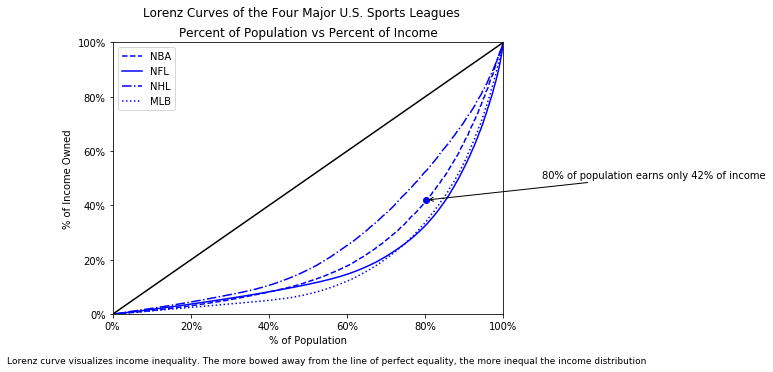

In [11]:
fig, ax = plt.subplots()

### Extracting the values for plotting
nba_values = lorenz_curve_values(salary_df, 'NBA')
nfl_values = lorenz_curve_values(salary_df, 'NFL')
mlb_values = lorenz_curve_values(salary_df, 'MLB')
nhl_values = lorenz_curve_values(salary_df, 'NHL')
# List of tuples with NBA Lorenz curve coordinate pairs
nba_values_list = list(zip(nba_values[1],nba_values[0]))


### Plotting each lorenz curve on the same plot
ax.plot(nba_values[0], nba_values[1], color = 'blue', linestyle = '--', label = 'NBA')
ax.plot(nfl_values[0], nfl_values[1], color = 'blue', linestyle = '-', label = 'NFL')
ax.plot(nhl_values[0], nhl_values[1], color = 'blue', linestyle = '-.', label = 'NHL')
ax.plot(mlb_values[0], mlb_values[1], color = 'blue', linestyle = ':', label = 'MLB')
plt.plot(nba_values_list[42][1], nba_values_list[42][0],'bo')
ax.annotate(s ='80% of population earns only 42% of income', xy = (nba_values_list[42][1],nba_values_list[42][0]), xytext = (1.1, .5),
            textcoords = 'axes fraction', arrowprops = {'arrowstyle':'->'})


### Line of perfect equality
ax.plot(np.linspace(0,1,101), np.linspace(0,1,101), color = 'black') 

### Chart characteristics
fig.suptitle('Lorenz Curves of the Four Major U.S. Sports Leagues')
fig.text(0.55, -.01, 
         'Lorenz curve visualizes income inequality. The more bowed away from the line of perfect equality, the more inequal the income distribution', 
         fontsize = 9,
         ha = 'center')
fig.set_size_inches(7,5)
ax.legend()
ax.set_xlim(0,1); ax.set_ylim(0,1)
ax.set_xticklabels(['0%','20%','40%','60%','80%','100%']); ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
ax.set_xlabel('% of Population'); ax.set_ylabel('% of Income Owned')
ax.set_title('Percent of Population vs Percent of Income')

fig.savefig(r'C:\Users\nlpru\Desktop\salary_distribution_project-master\Lorenz Curve V2.0.png', bbox_inches = 'tight')


<h1> Gini Coeffecient's of Major Sports Leagues vs United States </h1>
<p> The gini coeffecicent is a single-value measure of income inequality. Based on the Lorenz curve, the Gini Coeffecient is equal to twice the size of the area between the line of perfect equality and the lorenz curve of the measured population. While reducing inequality down to one number is an oversimplification, the Gini Coefficient allows comparisons across countries (or in our case, sports leagues) by producing a number on a scale from 0 to 1.  </p>
<p> The Gini Coeffecient is calculated by taking twice the difference between the area under the line of perfect equality and the Lorenz curve. Since the area under the line of perfect equality is .5, we can calculate the Gini Coefficient with the formula 2 * (.5 - area under Lorenz Curve) </p>

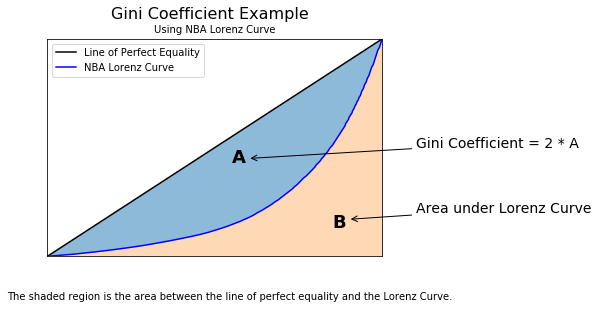

In [12]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,101), np.linspace(0,1,101), color = 'black', label = 'Line of Perfect Equality') 
ax.plot(nba_values[0], nba_values[1], color = 'blue',label = 'NBA Lorenz Curve')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.fill_between(nba_values[0], nba_values[0], np.linspace(0,1,101), alpha = .5)
ax.annotate(s = 'Gini Coefficient = 2 * A' ,xy = (.6,.45), xytext = (1.1,.5), xycoords = "axes fraction", fontsize = 14, arrowprops = {'arrowstyle': '->'})
ax.annotate('A', xy = (.55,.43), fontsize = 18, fontweight = 'bold')
ax.fill_between(nba_values[0], nba_values[1], alpha = .3)
ax.annotate('B', xy = (.85, .13), fontsize = 18, fontweight = 'bold')
ax.annotate(s = 'Area under Lorenz Curve' ,xy = (.90,.17), xytext = (1.1,.2), xycoords = "axes fraction", fontsize = 14, arrowprops = {'arrowstyle': '->'})
fig.suptitle('Gini Coefficient Example', fontsize = 16, y = .99)
ax.set_title('Using NBA Lorenz Curve', fontsize = 10)
ax.annotate('The shaded region is the area between the line of perfect equality and the Lorenz Curve.', xy = (0,0), xytext = (-.12,-.2),textcoords = 'axes fraction') 
plt.xticks([])
plt.yticks([])
ax.legend()
plt.show()


In [13]:
def gini_value(x,y):
    """Parameters are x, y coordinate arrays generated using 'Lorenz Curve Values' function. Y values are % of income (expressed
    from 0% to 100% in intervals of 1%), with X values being the corresponding % of population takes in the corresponding amount of income (Y)
    Function returns the gini value using np.trapz (Trapezoid Rule). Gini coefficient is equal to the difference between the area under the line of perfect equality,
    which is .5, minus the area under the Lorenz Curve multiplied by 2"""
    """np.trapz takes y coordinate array as parameter, with x coordinate array being optional"""
    return 2*(.5 - np.trapz(y,x))

In [14]:
united_states_gini_coefficient = .486
major_us_sports = ['NBA', 'NFL', 'NHL','MLB']
gini_coefficient_nba = gini_value(nba_values[0],nba_values[1])
gini_coefficient_mlb = gini_value(mlb_values[0], mlb_values[1])
gini_coefficient_nhl = gini_value(nhl_values[0],nhl_values[1])
gini_coefficient_nfl = gini_value(nfl_values[0],nfl_values[1])

<p> Below is a table of Gini Coefficients for the four major sports leagues, with the United States included as a reference point (source for U.S. data found <a href = 'https://www.census.gov/library/publications/2019/demo/p60-266.html'>here</a> in table A-3). </p>

In [16]:
names = ['US','NHL','NBA','NFL','MLB']
gini_coefficients = [united_states_gini_coefficient, gini_coefficient_nhl, gini_coefficient_nba, gini_coefficient_nfl, gini_coefficient_mlb]
pd.DataFrame(gini_coefficients, index = names, columns = ['Gini Coefficient'])

,Gini Coefficient
US,0.486000
NHL,0.453741
NBA,0.548113
NFL,0.606761
MLB,0.625803
